In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex

import warnings
warnings.filterwarnings('ignore')

In [2]:
#load the data set
df=pd.read_csv('./Data Sets/StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
#Shape the dataset
df.shape

(1000, 8)

**observation**
- There is **1000** Rows and **8** Columns

In [5]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


**Observation**
- There is total columns is 8 in which Numerical Columns is **3**

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [8]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

**Observation**
- The dataset contains no missing value it is clean

In [9]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [10]:
df["gender"].value_counts()

female    518
male      482
Name: gender, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

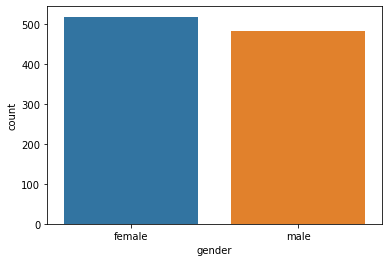

In [11]:
sns.countplot(df['gender'])

**Observation**
- The ratio is **female** is high

In [12]:
df["race/ethnicity"].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

<AxesSubplot:xlabel='race/ethnicity', ylabel='count'>

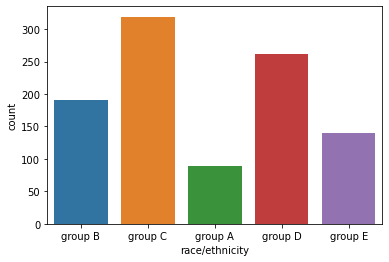

In [13]:
sns.countplot(df['race/ethnicity'])

**Observation**
- Group C ratio is high and group A is very small

In [14]:
df["parental level of education"].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

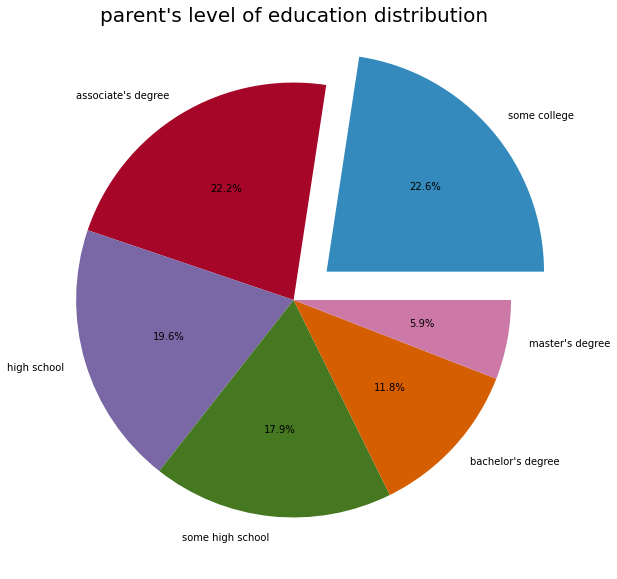

In [15]:
parent=df['parental level of education'].value_counts()
plt.figure(figsize=(15,10))
plt.style.use('bmh')
plt.pie(parent, labels=parent.index, autopct='%1.1f%%', explode=[0.2,0,0,0,0,0])
plt.title("parent's level of education distribution", fontsize=20)
plt.show()

In [16]:
df['lunch'].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

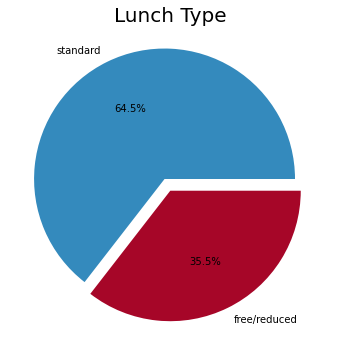

In [17]:
lunch=df['lunch'].value_counts()
plt.figure(figsize=(15,6))
plt.style.use('bmh')
plt.pie(lunch,labels=lunch.index,autopct='%1.1f%%', explode=[0.1,0])
plt.title("Lunch Type",fontsize=20)
plt.show()

**Observation**
- A large number of student took the standard lunch type

In [18]:
df['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

**Observation**
- Of all the students, only 358 took the test preparation course.



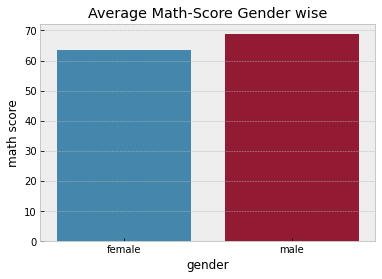

In [19]:
sns.barplot(data=df,x='gender',y="math score",ci=None)
plt.title("Average Math-Score Gender wise")
plt.show()

**Observation**
- Male Score is high

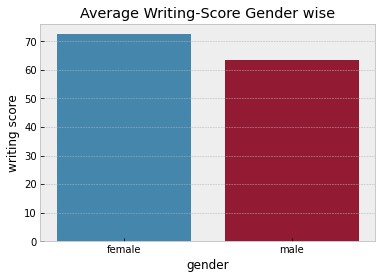

In [20]:
sns.barplot(data=df,x='gender',y="writing score",ci=None)
plt.title("Average Writing-Score Gender wise")
plt.show()

**Observation**
- Female Score is high

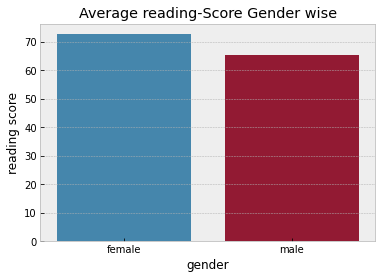

In [21]:
sns.barplot(data=df,x='gender',y="reading score",ci=None)
plt.title("Average reading-Score Gender wise")
plt.show()

**Observation**
- Female Score is high

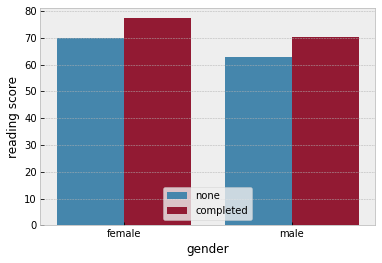

In [22]:
sns.barplot(data=df,x='gender',y="reading score",ci=None,hue='test preparation course')
plt.legend(loc='lower center')

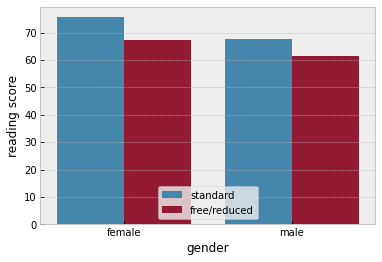

In [23]:
sns.barplot(data=df,x='gender',y="reading score",ci=None,hue='lunch')
plt.legend(loc='lower center')

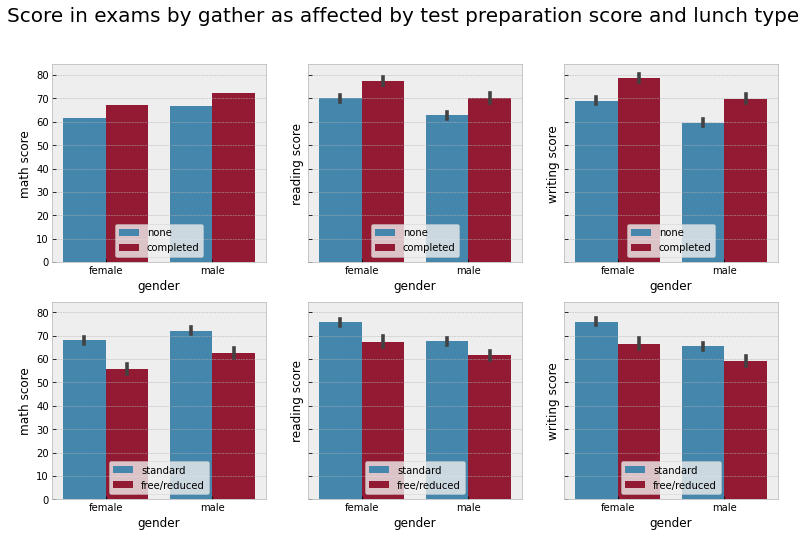

In [37]:
fig,axes=plt.subplots(2,3,sharey=True,figsize=(13,8))
sns.barplot(ax=axes[0,0],x='gender',y='math score',data=df,hue='test preparation course',ci=None)
sns.barplot(ax=axes[0,1],x='gender',y='reading score',data=df,hue='test preparation course')
sns.barplot(ax=axes[0,2],x='gender',y='writing score',data=df,hue='test preparation course')

sns.barplot(ax=axes[1,0],data=df,x='gender',y='math score',hue='lunch')
sns.barplot(ax=axes[1,1],data=df,x='gender',y='reading score',hue='lunch')
sns.barplot(ax=axes[1,2],data=df,x='gender',y='writing score',hue='lunch')
#plt.tight_layout(pad=4.0)
fig.suptitle("Score in exams by gather as affected by test preparation score and lunch type",fontsize=20)
axes[0,0].legend(loc='lower center')
axes[0,1].legend(loc='lower center')
axes[0,2].legend(loc='lower center')
axes[1,0].legend(loc='lower center')
axes[1,1].legend(loc='lower center')
axes[1,2].legend(loc='lower center')

plt.show()


**Observation**
- It appears that in the three exams, students who completed the test preparation and took the standard lunch type performed better than those who did not.

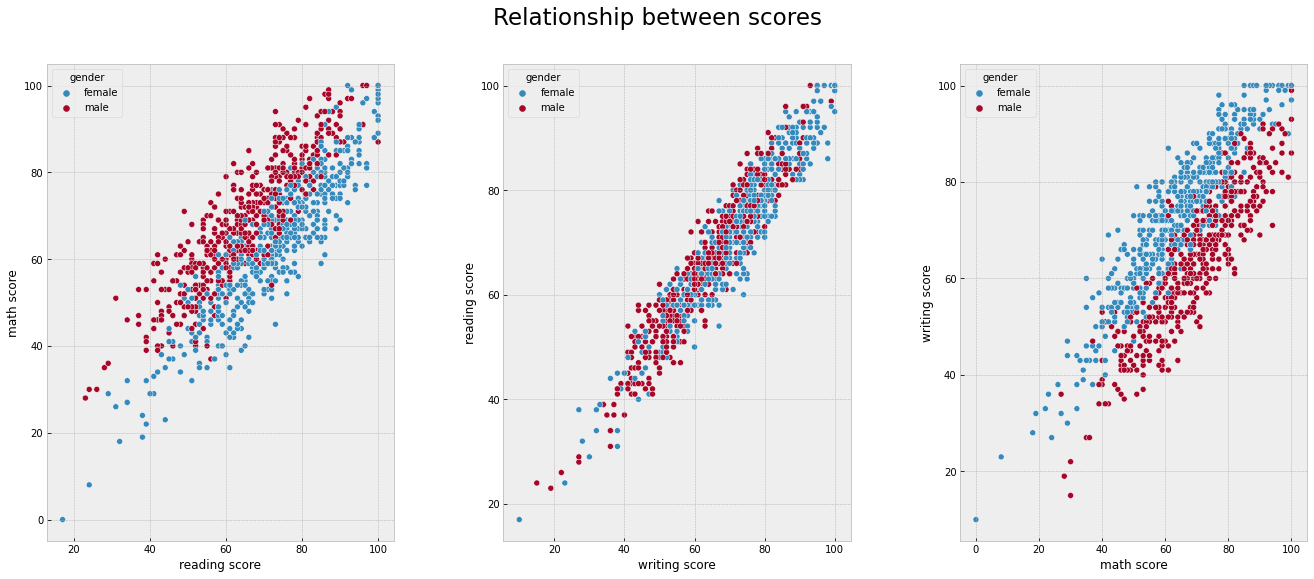

In [39]:
fig, axes=plt.subplots(1, 3, figsize=(20,9))
sns.scatterplot(ax=axes[0], x='reading score', y='math score', hue='gender', data=df)
sns.scatterplot(ax=axes[1], x='writing score', y='reading score', hue='gender', data=df)
sns.scatterplot(ax=axes[2], x='math score', y='writing score', hue='gender', data=df)
plt.tight_layout(pad=7.0)
fig.suptitle('Relationship between scores', fontsize=23)
plt.show()


In [40]:
df.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


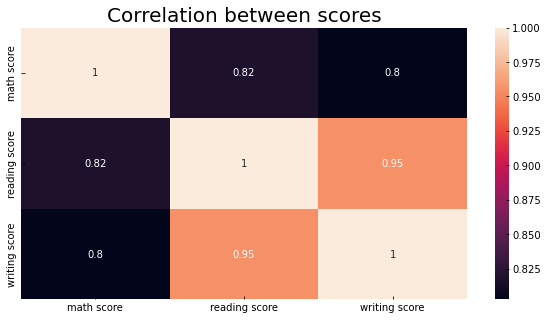

In [43]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),data=df,annot=True)
plt.title("Correlation between scores", fontsize=20)
plt.show()

**Observation**
- The scatter and heatmap plot explains the relationship between the scores.There is a high corellation between scores, students who performed well in any one of the exams also performed well in the other exams and vice versa. So instead of looking at individual scores, let sum up the scores and find out the effects of each of the variables on the total score.

In [44]:
df['Total Score']=df['math score']+df['reading score']+df['writing score']

In [45]:
df.head(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278


In [48]:
gender=df.groupby('gender')['Total Score'].mean()
data=pd.DataFrame()
data['gender']=gender.index
data['Avg_Total_Score']=gender.values
data

,gender,Avg_Total_Score
0,female,208.708494
1,male,197.512448


In [57]:
sns.catplot(data=df,x='gender',y='Avg_Total_Score')

ValueError: Could not interpret input 'Avg_Total_Score'